In [58]:
## anna jaeger wrote most of these scripts 

import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:

vars = pd.read_csv('variants.tsv', sep = '\t')


In [60]:
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1
...,...,...,...,...,...,...,...,...
1889,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9
1890,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9
1891,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9
1892,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9


In [61]:
vars.loc[vars['segment'] == 'na', 'gene'] = 'NA'
vars['amino_acid'] = vars['coding_region_change'].str.extract('(\d+)')


In [62]:
# #make merged column for gene and its position
vars['gene_pos'] = vars['gene'] + "_" + vars['amino_acid'].astype(str)


In [63]:
vars['sample_var'] = vars['sample'] + "_" + vars['gene_pos'].astype(str)


In [64]:
vars['syn_non'] = vars['coding_region_change'].apply(
    lambda x: 'synonymous' if x[:3] == x[-3:] else 'nonsynonymous'
)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous
...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous
1890,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous
1891,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous
1892,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous


[Text(0.5, 0, 'Rep 1 Frequency'), Text(0, 0.5, 'Rep 2 Frequency')]

<Figure size 800x800 with 0 Axes>

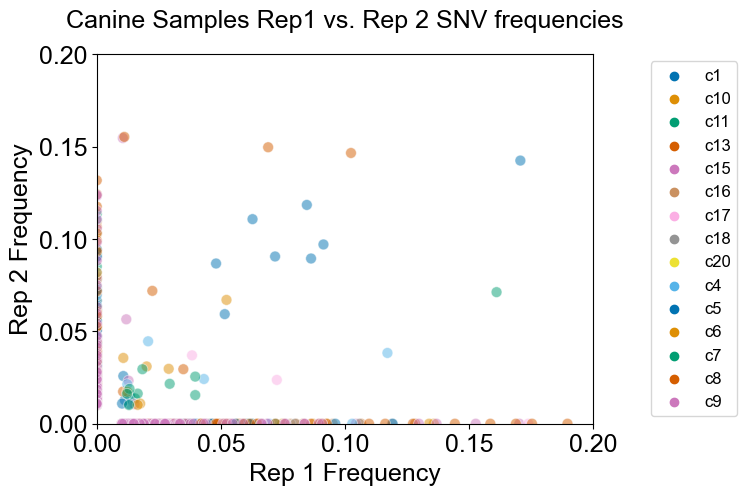

In [65]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 8))  # Adjust figure size

fig, ax = plt.subplots()

sns.scatterplot(data=vars, x="Frequency_1", y="Frequency_2", s=60, alpha=.5, hue='sample', palette='colorblind')
plt.ylim(0, 0.2)
plt.xlim(0, 0.2)
plt.title('Canine Samples Rep1 vs. Rep 2 SNV frequencies', y=1.05, fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=12)

ax.set(xlabel='Rep 1 Frequency', ylabel='Rep 2 Frequency')


# # Format y-axis to show integers
# fmtr = tkr.StrMethodFormatter('{x:.1f}')
# ax.xaxis.set_major_formatter(fmtr)
# ax.yaxis.set_major_formatter(fmtr)

In [66]:
vars['rep_shared'] = np.where(
    (vars['Frequency_1'].fillna(0) > 0) & (vars['Frequency_2'].fillna(0) > 0),
    'shared',
    'single'
)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single
1890,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single
1891,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single
1892,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single


In [67]:
vars['rep_shared'].value_counts()


single    1837
shared      57
Name: rep_shared, dtype: int64

In [68]:
vars_sorted = vars.sort_values(by=['sample', 'gene', 'position'], ascending=[False, True, True])
vars_sorted.tail(15)

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared
16,np,1524,A,Ala493Ala,NP,0.0000,0.0133,c1,493,NP_493,c1_NP_493,synonymous,single
17,pa,138,A,Ile38Met,PA,0.0000,0.0172,c1,38,PA_38,c1_PA_38,nonsynonymous,single
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared
19,pa,468,T,Phe148Phe,PA,0.0108,0.0000,c1,148,PA_148,c1_PA_148,synonymous,single
20,pa,510,T,Thr162Thr,PA,0.0000,0.0129,c1,162,PA_162,c1_PA_162,synonymous,single
21,pa,827,T,Leu268Pro,PA,0.0000,0.0156,c1,268,PA_268,c1_PA_268,nonsynonymous,single
22,pa,850,T,Cys276Arg,PA,0.0000,0.0154,c1,276,PA_276,c1_PA_276,nonsynonymous,single
23,pa,1489,T,Cys489Ser,PA,0.0719,0.0905,c1,489,PA_489,c1_PA_489,nonsynonymous,shared
24,pa,1802,A,Glu593Gly,PA,0.0000,0.0103,c1,593,PA_593,c1_PA_593,nonsynonymous,single
25,pb2,122,A,Lys32Arg,PB2,0.0000,0.0102,c1,32,PB2_32,c1_PB2_32,nonsynonymous,single


In [69]:
vars_result = vars.groupby('gene')['rep_shared'].value_counts()
vars_result

gene  rep_shared
HA    single        292
      shared         15
M1    single        110
      shared          3
M2    single         51
      shared          2
NA    single        283
      shared          4
NEP   single         26
NP    single        254
      shared          3
NS1   single         85
      shared          3
PA    single        277
      shared         11
PB1   single        159
      shared          5
PB2   single        300
      shared         11
Name: rep_shared, dtype: int64

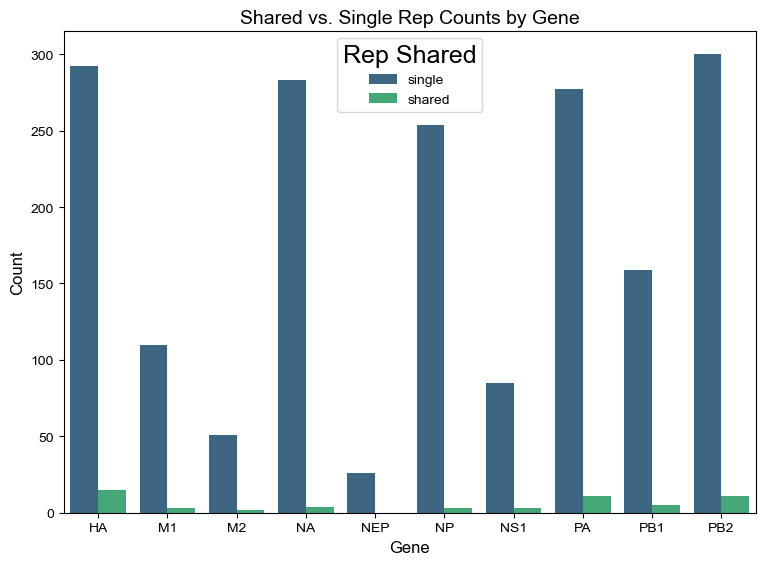

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'gene' and count unique values in 'rep_shared'
result = vars.groupby('gene')['rep_shared'].value_counts().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='gene', y='count', hue='rep_shared', palette='viridis')

# Add labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Shared vs. Single Rep Counts by Gene', fontsize=14)
plt.legend(title='Rep Shared', fontsize=10, loc='upper center')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
# plt.savefig("seq/analysis/figures/shared_vs_singlerep_countsbygene.pdf", bbox_inches='tight', dpi=300)


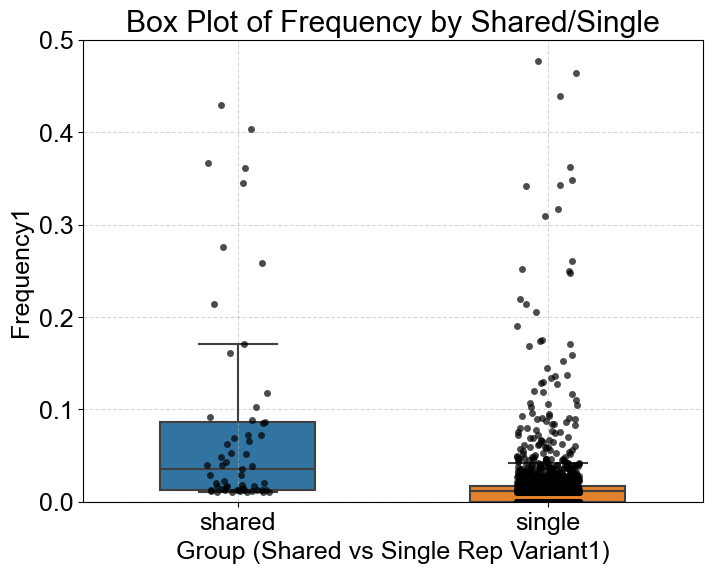

In [71]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_1', data=vars, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='Frequency_1', data=vars, jitter=True, color='black', alpha=0.7)  # Individual points

# Customize plot
plt.xlabel("Group (Shared vs Single Rep Variant1)")
plt.ylabel("Frequency1")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
# plt.yscale('logit')
plt.ylim(0, 0.5)

# Show plot
plt.show()

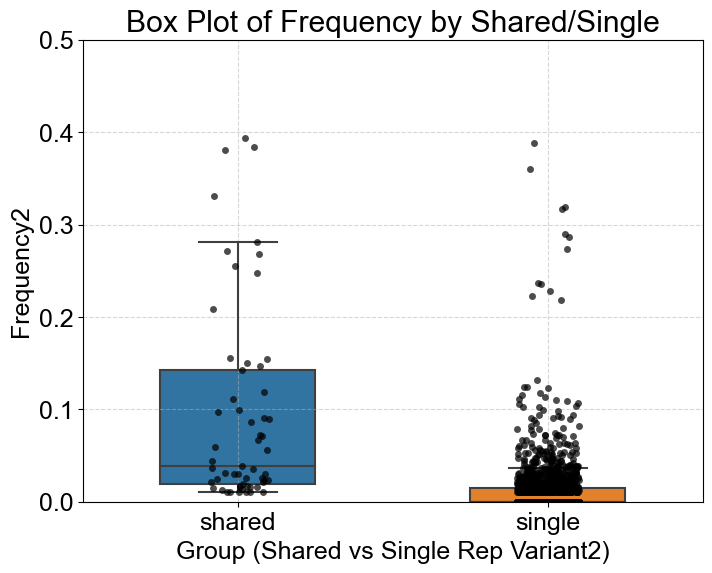

In [72]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_2', data=vars, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='Frequency_2', data=vars, jitter=True, color='black', alpha=0.7)  # Individual points

# Customize plot
plt.xlabel("Group (Shared vs Single Rep Variant2)")
plt.ylabel("Frequency2")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
# plt.yscale('logit')
plt.ylim(0, 0.5)

# Show plot
plt.show()

In [73]:
import scipy.stats as stats

# Calculate means
vars = vars.dropna(subset=["Frequency_1"])

means = vars.groupby("rep_shared")["Frequency_1"].mean()
print("Mean Frequency1 by Group:")
print(means)

# Perform independent t-test
shared = vars[vars["rep_shared"] == "shared"]["rep_shared"]
single = vars[vars["rep_shared"] == "single"]["rep_shared"]

# t_stat, p_value = stats.ttest_ind(shared, single, equal_var=False)  # Welch's t-test (better for unequal variances)

# # Display results
# print(f"\nT-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")


Mean Frequency1 by Group:
rep_shared
shared    0.081905
single    0.015999
Name: Frequency_1, dtype: float64


In [74]:
import scipy.stats as stats

# Calculate means
vars = vars.dropna(subset=["Frequency_2"])

means = vars.groupby("rep_shared")["Frequency_2"].mean()
print("Mean Frequency2 by Group:")
print(means)

# Perform independent t-test
shared = vars[vars["rep_shared"] == "shared"]["rep_shared"]
single = vars[vars["rep_shared"] == "single"]["rep_shared"]

# t_stat, p_value = stats.ttest_ind(shared, single, equal_var=False)  # Welch's t-test (better for unequal variances)

# # Display results
# print(f"\nT-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")


Mean Frequency2 by Group:
rep_shared
shared    0.095342
single    0.011986
Name: Frequency_2, dtype: float64


In [75]:
single_rep_vars = vars[vars['rep_shared'] == 'single']

In [76]:
# single_rep_vars['avg_freq'] = single_rep_vars['frequency']
single_rep_vars['avg_freq'] = single_rep_vars['Frequency_1'] + single_rep_vars['Frequency_2']

single_rep_vars

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_68328/3374936531.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104
6,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single,0.0173
1890,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single,0.0390
1891,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single,0.0149
1892,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single,0.0275


In [77]:
shared_vars = vars[vars['rep_shared'] == 'shared']
# shared_vars = shared_vars.sort_values(by=['sample_ID', 'gene', 'reference_position'], ascending=[True, True, True])
shared_vars['avg_freq'] = shared_vars[['Frequency_1', 'Frequency_2']].mean(axis=1)

shared_vars

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_68328/2824890257.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745
5,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430
10,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205
14,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545
23,pa,1489,T,Cys489Ser,PA,0.0719,0.0905,c1,489,PA_489,c1_PA_489,nonsynonymous,shared,0.08120
90,ha,492,T,Cys155Arg,HA,0.0397,0.0155,c11,155,HA_155,c11_HA_155,nonsynonymous,shared,0.02760
104,ha,1081,T,Ile351Lys,HA,0.3451,0.0996,c11,351,HA_351,c11_HA_351,nonsynonymous,shared,0.22235
113,ha,1530,A,Thr501Ala,HA,0.0154,0.0137,c11,501,HA_501,c11_HA_501,nonsynonymous,shared,0.01455
115,ha,1623,T,Leu532Leu,HA,0.0165,0.0163,c11,532,HA_532,c11_HA_532,synonymous,shared,0.01640


In [78]:
##since i needed to get avg vars differently for single and shared, did that now will concat together for big vars df
vars = pd.concat([single_rep_vars, shared_vars], ignore_index=True)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
0,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.01210
1,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.01060
2,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.01010
3,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.01040
4,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.01180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395
1890,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155
1891,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715
1892,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315


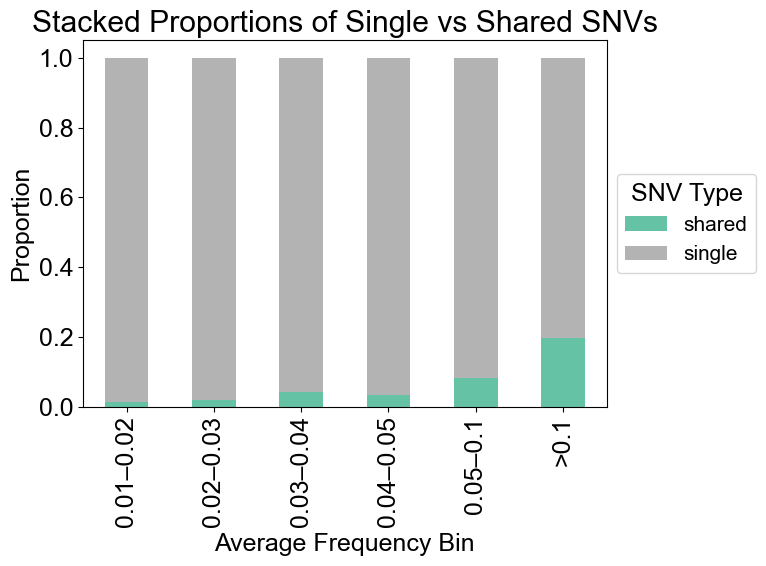

In [79]:
# Example bin edges
bins = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['0.01–0.02', '0.02–0.03', '0.03–0.04', '0.04–0.05', '0.05–0.1', '>0.1']
vars['freq_bin'] = pd.cut(vars['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = vars.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())

# plt.figure(figsize=(8, 6))
# sns.barplot(data=grouped, x='freq_bin', y='proportion', hue='rep_shared')

# plt.xlabel('Average Frequency Bin')
# plt.ylabel('Proportion')
# plt.title('Proportion of Single vs Shared SNVs by Frequency Bin')
# plt.legend(title='SNV Type')
# plt.tight_layout()
# plt.show()

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.xlabel('Average Frequency Bin')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type', fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [80]:
freq1 = vars.drop(columns=['Frequency_2'])
freq1 = freq1[freq1['Frequency_1'] != 0]

freq2 = vars.drop(columns=['Frequency_1'])
freq2 = freq2[freq2['Frequency_2'] != 0]

freq1 = freq1.rename(columns={'Frequency_1': 'Frequency'})
freq2 = freq2.rename(columns={'Frequency_2': 'Frequency'})


In [81]:
freq_stacked = pd.concat([freq1, freq2], axis=0)
freq_stacked = freq_stacked.drop('freq_bin', axis=1)

freq_stacked

,segment,position,allele,coding_region_change,gene,Frequency,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
5,mp,981,C,Ser319Stop,M2,0.0101,c1,319,M2_319,c1_M2_319,nonsynonymous,single,0.01010
6,na,118,G,Val33Val,NA,0.0108,c1,33,NA_33,c1_NA_33,synonymous,single,0.01080
7,na,232,T,Thr71Thr,NA,0.0154,c1,71,NA_71,c1_NA_71,synonymous,single,0.01540
14,pa,468,T,Phe148Phe,PA,0.0108,c1,148,PA_148,c1_PA_148,synonymous,single,0.01080
20,pb2,598,G,Glu191Lys,PB2,0.0243,c1,191,PB2_191,c1_PB2_191,nonsynonymous,single,0.02430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1414,A,Ile463Leu,PB2,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395
1890,pb2,2133,A,Lys702Lys,PB2,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155
1891,np,436,G,Ala131Thr,NP,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715
1892,pb2,1936,A,Thr637Ala,PB2,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315


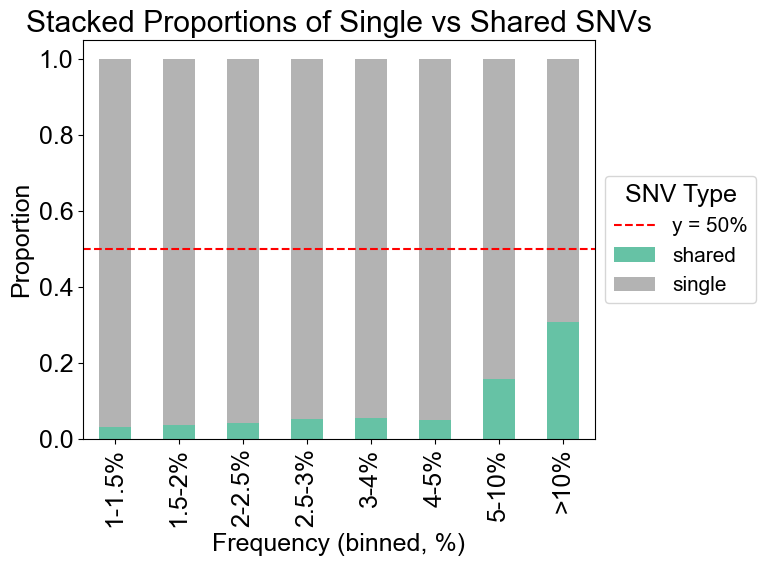

In [82]:
# Example bin edges
bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-3%', '3-4%', '4-5%', '5-10%', '>10%']
freq_stacked['freq_bin'] = pd.cut(freq_stacked['Frequency'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = freq_stacked.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type', fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [83]:
freq_stacked['freq_bin'].value_counts()

1-1.5%    832
1.5-2%    360
2-2.5%    189
3-4%      146
2.5-3%    135
5-10%     134
>10%       94
4-5%       61
Name: freq_bin, dtype: int64

In [84]:
vars['sample_var'] = vars['sample'] + "_" + vars['gene_pos'].astype(str)
vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   segment               1894 non-null   object  
 1   position              1894 non-null   int64   
 2   allele                1894 non-null   object  
 3   coding_region_change  1894 non-null   object  
 4   gene                  1894 non-null   object  
 5   Frequency_1           1894 non-null   float64 
 6   Frequency_2           1894 non-null   float64 
 7   sample                1894 non-null   object  
 8   amino_acid            1894 non-null   object  
 9   gene_pos              1894 non-null   object  
 10  sample_var            1894 non-null   object  
 11  syn_non               1894 non-null   object  
 12  rep_shared            1894 non-null   object  
 13  avg_freq              1894 non-null   float64 
 14  freq_bin              1894 non-null   category
dtypes: c

In [85]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()
# fig.savefig("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf", bbox_inches='tight', dpi=300)
# fig.write_image("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf")

In [86]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5)

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()

In [87]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(shared_vars, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for shared SNVs <15%",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

# Define axis limits
x_min, x_max = 0, 0.15  # Adjust as needed
y_min, y_max = 0, 0.15  # Adjust as needed

# Make the plot square and set axis limits
fig.update_layout(
    width=600,  
    height=600,  
    xaxis=dict(scaleanchor="y", range=[x_min, x_max]),  
    yaxis=dict(range=[y_min, y_max])
)

# Show the plot
fig.show()


In [88]:
valcts_sampleIDs = single_rep_vars['sample'].value_counts()
print(valcts_sampleIDs)

c13    320
c4     250
c11    191
c5     190
c15    189
c9     183
c8     167
c16    122
c6      78
c10     49
c7      32
c18     30
c1      25
c17     10
c20      1
Name: sample, dtype: int64


In [89]:
# Define your mapping from col_id to ct values
col_id_to_ct = {
    
    'c1': 17.3,
    'c2': 22.4,
    'c3': 36.1,
    'c4': 27.6,
    'c5': 26.8,
    'c6': 22.9,
    'c7': 23.0,
    'c8': 29.6,
    'c9': 31.0,
    'c10': 31.6,
    'c11': 28.9,
    'c12': 24.4,
    'c13': 30.9,
    'c14': 25.7,
    'c15': 29.1,
    'c16': 26.3,
    'c17': 15.3,
    'c18': 31.5,
    'c19': 27.0,
    'c20': 38.4
}


# Create the new column using .map()
vars['ct_value'] = vars['sample'].map(col_id_to_ct)
vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value
0,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.01210,0.01–0.02,17.3
1,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.01060,0.01–0.02,17.3
2,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.01010,0.01–0.02,17.3
3,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.01040,0.01–0.02,17.3
4,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.01180,0.01–0.02,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1414,A,Ile463Leu,PB2,0.0184,0.0295,c7,463,PB2_463,c7_PB2_463,nonsynonymous,shared,0.02395,0.02–0.03,23.0
1890,pb2,2133,A,Lys702Lys,PB2,0.0130,0.0101,c7,702,PB2_702,c7_PB2_702,synonymous,shared,0.01155,0.01–0.02,23.0
1891,np,436,G,Ala131Thr,NP,0.0224,0.0719,c8,131,NP_131,c8_NP_131,nonsynonymous,shared,0.04715,0.04–0.05,29.6
1892,pb2,1936,A,Thr637Ala,PB2,0.0111,0.1552,c8,637,PB2_637,c8_PB2_637,nonsynonymous,shared,0.08315,0.05–0.1,29.6


In [90]:
import plotly.express as px

fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)  # Adjust transparency for better visibility

fig.show()


In [91]:
import plotly.express as px

fig = px.scatter(vars, 
                 y="ct_value", 
                 x="avg_freq", 
                 color="rep_shared",  # Colors by 'rep_shared'
                 trendline="ols",      # Adds a trend line for each group
                 title="CT-Value vs Frequency (Trend Lines for Each Group)",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


In [92]:
import plotly.express as px

# Count number of variants for each CT value and rep_shared group
variant_counts = vars.groupby(["ct_value", "rep_shared"]).size().reset_index(name="variant_count")

# Scatter plot with trend line
fig = px.scatter(variant_counts, 
                 x="ct_value", 
                 y="variant_count",  # Now plotting count of variants
                 color="rep_shared",  
                 trendline="ols",    
                 title="CT-Value vs Variant Count (OLS Trend Lines for Each Group)",
                 labels={"ct_value": "Ct-Value", "variant_count": "Number of Variants"},
                 opacity=0.5)

fig.show()


In [93]:
# fig = px.scatter(shared_vars, 
#                  x="ct_value", 
#                  y="avg_freq", 
#                  color="rep_shared", 
#                  title="CT-Value vs Frequency Colored by Shared",
#                  labels={"ct-value": "CT Value", "frequency": "Frequency"},
#                  opacity=0.3)  # Adjust transparency for better visibility

# fig.show()
import plotly.express as px

fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


In [94]:
fig = px.scatter(vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()

In [95]:
single_rep_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq
1,ha,1219,T,Leu397Ser,HA,0.0000,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121
2,ha,1343,T,Ser438Ser,HA,0.0000,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106
3,ha,1426,A,Lys466Arg,HA,0.0000,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101
4,ha,1449,A,Asn474Asp,HA,0.0000,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104
6,mp,722,C,Leu233Phe,M1,0.0000,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,pb2,1984,T,Ser653Pro,PB2,0.0173,0.0000,c9,653,PB2_653,c9_PB2_653,nonsynonymous,single,0.0173
1890,pb2,2067,T,Asp680Asp,PB2,0.0390,0.0000,c9,680,PB2_680,c9_PB2_680,synonymous,single,0.0390
1891,pb2,2155,A,Ile710Val,PB2,0.0149,0.0000,c9,710,PB2_710,c9_PB2_710,nonsynonymous,single,0.0149
1892,pb2,2179,A,Lys718Glu,PB2,0.0275,0.0000,c9,718,PB2_718,c9_PB2_718,nonsynonymous,single,0.0275


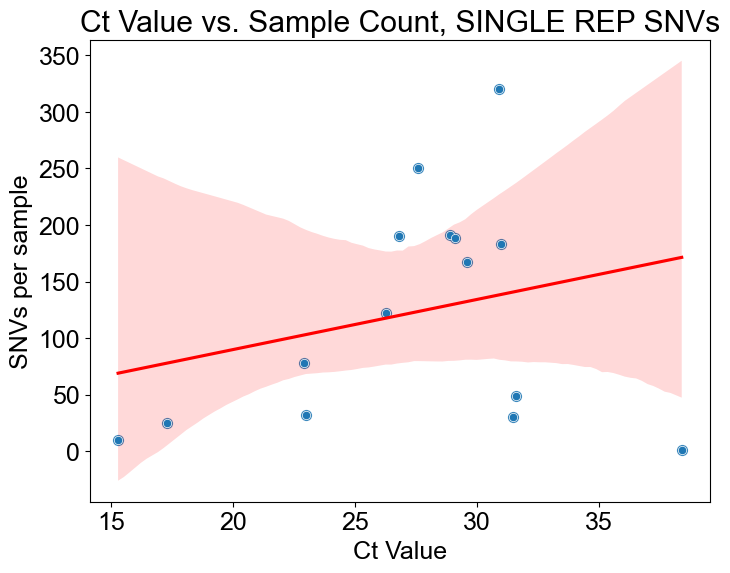

In [96]:
# Count occurrences of each sample_ID

single_rep_vars = vars[vars['rep_shared'] == 'single']

sample_counts = single_rep_vars['sample'].value_counts().reset_index()
sample_counts.columns = ['sample', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = single_rep_vars[['sample', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SINGLE REP SNVs')


plt.show()


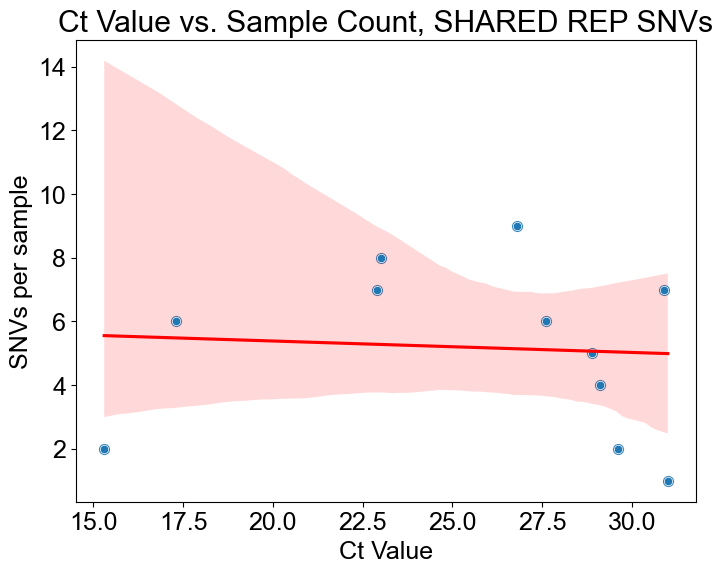

In [97]:
# Count occurrences of each sample_ID

single_rep_vars = vars[vars['rep_shared'] == 'shared']

sample_counts = single_rep_vars['sample'].value_counts().reset_index()
sample_counts.columns = ['sample', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = single_rep_vars[['sample', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SHARED REP SNVs')


plt.show()


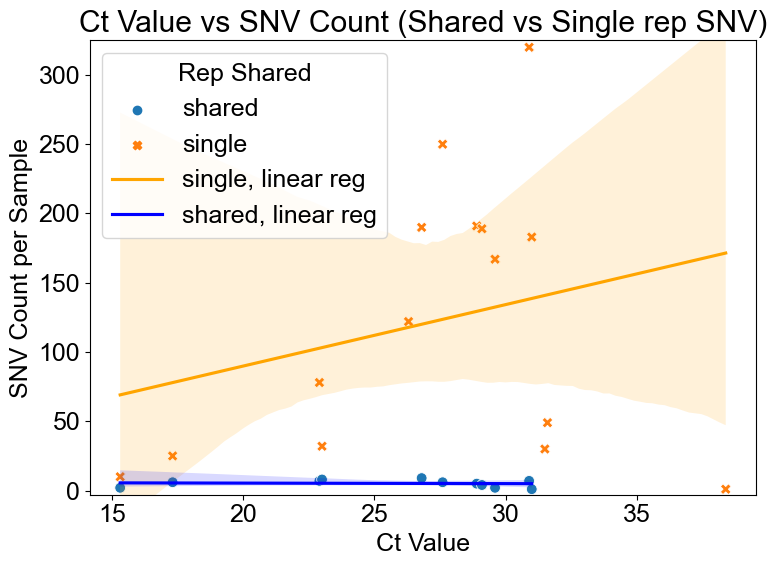

In [98]:
# Group by sample_ID and rep_shared to count SNVs
rep_counts = vars.groupby(['sample', 'rep_shared']).size().reset_index(name='count')

# Merge in Ct values (assuming unique per sample_ID)
sample_metadata = vars[['sample', 'ct_value']].drop_duplicates()
rep_counts = rep_counts.merge(sample_metadata, on='sample')


plt.figure(figsize=(8, 6))

# Scatterplot and regression per group
sns.scatterplot(data=rep_counts, x='ct_value', y='count', hue='rep_shared', style='rep_shared', s=60)
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'single'], 
            x='ct_value', y='count', scatter=False, label='single, linear reg', color='orange')
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'shared'], 
            x='ct_value', y='count', scatter=False, label='shared, linear reg', color='blue')

# Labels and formatting
plt.xlabel('Ct Value')
plt.ylabel('SNV Count per Sample')
plt.title('Ct Value vs SNV Count (Shared vs Single rep SNV)')
plt.ylim(-3,325)
plt.legend(title='Rep Shared')
plt.tight_layout()

# plt.savefig("seq/analysis/figures/ctval_snvcount_regress.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [99]:
vars['gene_pos_nt'] = vars['gene'] + "_" + vars['position'].astype(str)
vars.head(5)

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,freq_bin,ct_value,gene_pos_nt
0,ha,1219,T,Leu397Ser,HA,0.0,0.0121,c1,397,HA_397,c1_HA_397,nonsynonymous,single,0.0121,0.01–0.02,17.3,HA_1219
1,ha,1343,T,Ser438Ser,HA,0.0,0.0106,c1,438,HA_438,c1_HA_438,synonymous,single,0.0106,0.01–0.02,17.3,HA_1343
2,ha,1426,A,Lys466Arg,HA,0.0,0.0101,c1,466,HA_466,c1_HA_466,nonsynonymous,single,0.0101,0.01–0.02,17.3,HA_1426
3,ha,1449,A,Asn474Asp,HA,0.0,0.0104,c1,474,HA_474,c1_HA_474,nonsynonymous,single,0.0104,0.01–0.02,17.3,HA_1449
4,mp,722,C,Leu233Phe,M1,0.0,0.0118,c1,233,M1_233,c1_M1_233,nonsynonymous,single,0.0118,0.01–0.02,17.3,M1_722


In [100]:
shared_vars.columns

Index(['segment', 'position', 'allele', 'coding_region_change', 'gene',
       'Frequency_1', 'Frequency_2', 'sample', 'amino_acid', 'gene_pos',
       'sample_var', 'syn_non', 'rep_shared', 'avg_freq'],
      dtype='object')

In [101]:
shared_vars['gene_pos_nt'] = shared_vars['gene'] + "_" + shared_vars['position'].astype(str)
shared_vars.head(5)

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,HA_1081
5,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430,M1_314
10,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205,NA_720
14,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825,NA_1221
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545,PA_300


In [102]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars.groupby(['sample', 'gene'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
syn_nonsyn_counts = syn_nonsyn_counts.reset_index()

# Print or export the result
syn_nonsyn_counts


syn_non,sample,gene,nonsynonymous,synonymous
0,c1,HA,1,0
1,c1,M1,1,0
2,c1,NA,2,0
3,c1,PA,1,1
4,c11,HA,3,1
5,c11,PA,1,0
6,c13,HA,1,0
7,c13,M1,0,1
8,c13,PA,1,0
9,c13,PB1,1,0


In [103]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars.groupby(['sample'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
total_syn_nonsyn_counts = syn_nonsyn_counts.reset_index()
total_syn_nonsyn_counts = total_syn_nonsyn_counts.rename_axis(None, axis=1).reset_index()

total_syn_nonsyn_counts = total_syn_nonsyn_counts.drop(columns=['index'])

# Print or export the result
total_syn_nonsyn_counts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample         11 non-null     object
 1   nonsynonymous  11 non-null     int64 
 2   synonymous     11 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [104]:
total_syn_nonsyn_counts

,sample,nonsynonymous,synonymous
0,c1,5,1
1,c11,4,1
2,c13,4,3
3,c15,3,1
4,c17,2,0
5,c4,3,3
6,c5,6,3
7,c6,3,4
8,c7,5,3
9,c8,2,0


In [105]:
# merged_df = pd.merge(total_syn_nonsyn_counts, ct_df, on='sample_ID')
# merged_df

In [106]:
# merged_df.to_csv('../Desktop/HPAI_PA/2025_03_04_total_syn_nonsyn_counts.tsv',sep='\t', index=False)

In [107]:
# merged_df.columns

In [108]:
# fig = px.scatter(merged_df, x='ct_value', y="synonymous", color = 'sample_ID', symbol = 'domestic_status', width=950, height=600)
#                  #, symbol = 'domestic_status', color='Species')
# fig.show()

In [109]:
syn_nonsyn_counts.tail(35)

syn_non,nonsynonymous,synonymous
sample,,
c1,5,1
c11,4,1
c13,4,3
c15,3,1
c17,2,0
c4,3,3
c5,6,3
c6,3,4
c7,5,3


In [110]:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})

In [111]:
shared_vars["avg_freq_percent"] = shared_vars["avg_freq"] * 100
shared_vars

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt,avg_freq_percent
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,HA_1081,37.745
5,mp,314,G,Val97Ile,M1,0.0134,0.0152,c1,97,M1_97,c1_M1_97,nonsynonymous,shared,0.01430,M1_314,1.430
10,na,720,A,Asn234Ser,NA,0.0113,0.0128,c1,234,NA_234,c1_NA_234,nonsynonymous,shared,0.01205,NA_720,1.205
14,na,1221,A,Asn401Ser,NA,0.0107,0.0258,c1,401,NA_401,c1_NA_401,nonsynonymous,shared,0.01825,NA_1221,1.825
18,pa,300,T,Asn92Asn,PA,0.0516,0.0593,c1,92,PA_92,c1_PA_92,synonymous,shared,0.05545,PA_300,5.545
23,pa,1489,T,Cys489Ser,PA,0.0719,0.0905,c1,489,PA_489,c1_PA_489,nonsynonymous,shared,0.08120,PA_1489,8.120
90,ha,492,T,Cys155Arg,HA,0.0397,0.0155,c11,155,HA_155,c11_HA_155,nonsynonymous,shared,0.02760,HA_492,2.760
104,ha,1081,T,Ile351Lys,HA,0.3451,0.0996,c11,351,HA_351,c11_HA_351,nonsynonymous,shared,0.22235,HA_1081,22.235
113,ha,1530,A,Thr501Ala,HA,0.0154,0.0137,c11,501,HA_501,c11_HA_501,nonsynonymous,shared,0.01455,HA_1530,1.455
115,ha,1623,T,Leu532Leu,HA,0.0165,0.0163,c11,532,HA_532,c11_HA_532,synonymous,shared,0.01640,HA_1623,1.640


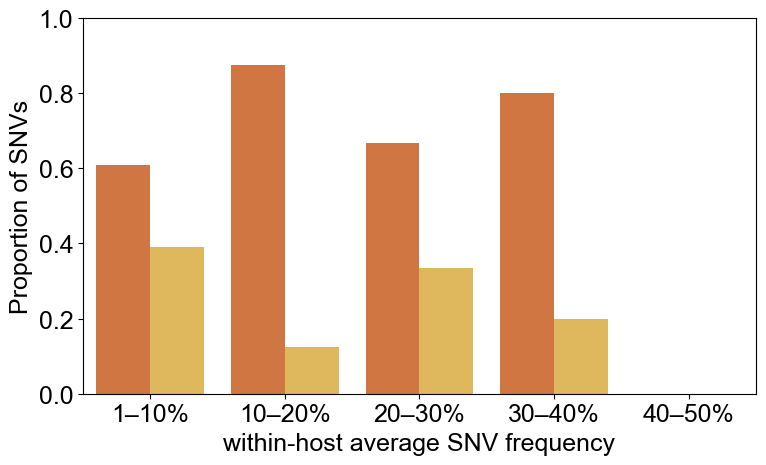

In [112]:

plt.rcParams["font.family"] = "Arial"


# Define color palette
palette = {
    "nonsynonymous": "#e8702a",  # burnt orange
    "synonymous": "#F5BF47"
}

# Define bins and bin labels
bins = [0, 10, 20, 30, 40, 50]
labels = ["1–10%", "10–20%", "20–30%", "30–40%", "40–50%"]

# Assign frequency bin to each variant
shared_vars["freq_bin"] = pd.cut(
    shared_vars["avg_freq_percent"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Group by bin and syn_non, count the number of variants
group_counts = shared_vars.groupby(["freq_bin", "syn_non"]).size().reset_index(name="count")

# Compute total per bin to calculate proportions
totals = group_counts.groupby("freq_bin")["count"].transform("sum")
group_counts["proportion"] = group_counts["count"] / totals

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=group_counts,
    x="freq_bin",
    y="proportion",
    hue="syn_non",
    palette=palette
)

plt.xlabel("within-host average SNV frequency")
plt.ylabel("Proportion of SNVs")

plt.ylim(0, 1)
plt.legend().remove()

plt.tight_layout()
plt.show()


In [113]:
from scipy.integrate import quad

def integrate_over_bins(lower_bound,upper_bound):
    # generate lambda function for 1/x
    f= lambda x:(1/x)

    # integrate between bins 
    integral = quad(f, lower_bound, upper_bound)[0]
    return(integral)

def return_area_under_curve(bins):

    total_area_under_curve = 0
    integrals = []
    
    for i in range(len(bins)-1):
        lower_bound = bins[i]
        upper_bound = bins[i+1]
        integral = integrate_over_bins(lower_bound,upper_bound)
        integrals.append(integral)
        
    total_area_under_curve = np.asarray(integrals).sum()
    return(total_area_under_curve, integrals)

def return_neutral_expectation(total_area_under_curve, integrals):
    proportions = []
    for i in integrals: 
        proportion = i/total_area_under_curve
        proportions.append(proportion)
        
    return(proportions)

In [114]:
bins = [0.01,0.1,0.2,0.3,0.4,0.5]
total_area_under_curve, integrals = return_area_under_curve(bins)
proportions = return_neutral_expectation(total_area_under_curve, integrals)
neutral_df = pd.DataFrame({"bin":["1-10%","10-20%","20-30%","30-40%","40-50%"],"expected":proportions})

neutral_df

,bin,expected
0,1-10%,0.588592
1,10-20%,0.177184
2,20-30%,0.103646
3,30-40%,0.073538
4,40-50%,0.057040


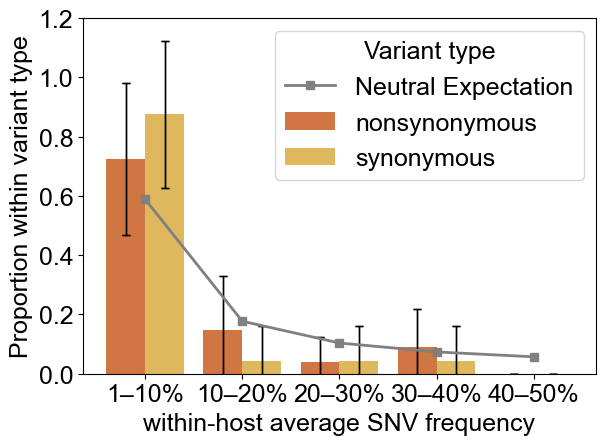

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "Arial"

# Define color palette
palette = {
    "nonsynonymous": "#e8702a",  # burnt orange
    "synonymous": "#F5BF47"
}

# Define bins and labels
bins = [0, 10, 20, 30, 40, 50]
labels = ["1–10%", "10–20%", "20–30%", "30–40%", "40–50%"]

# Assign frequency bin
shared_vars["freq_bin"] = pd.cut(
    shared_vars["avg_freq_percent"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Calculate proportion per sample within variant type
# (so that we can later compute SD across samples)
prop_df = (
    shared_vars
    .groupby(["sample", "freq_bin", "syn_non"])
    .size()
    .reset_index(name="count")
)

# Total per sample & type
totals_per_sample_type = prop_df.groupby(["sample", "syn_non"])["count"].transform("sum")
prop_df["proportion"] = prop_df["count"] / totals_per_sample_type

# print(totals_per_sample_type)
# print(prop_df.head(30))

# Now compute mean and std for each bin & type
summary_stats = (
    prop_df
    .groupby(["freq_bin", "syn_non"])
    .agg(mean_prop=("proportion", "mean"),
         std_prop=("proportion", "std"))
    .reset_index()
)

# print(summary_stats)

# Add error bars
for i, row in summary_stats.iterrows():
    hue_offset = -0.2 if row["syn_non"] == "nonsynonymous" else 0.2
    plt.errorbar(
        x=i//2 + hue_offset,
        y=row["mean_prop"],
        yerr=row["std_prop"],
        fmt='none',
        ecolor='black',
        capsize=3,
        linewidth=1
    )

# Plot bars

sns.barplot(
    data=summary_stats,
    x="freq_bin",
    y="mean_prop",
    hue="syn_non",
    palette=palette,
    errorbar=None
)

# Add error bars
for i, row in summary_stats.iterrows():
    hue_offset = -0.2 if row["syn_non"] == "nonsynonymous" else 0.2
    plt.errorbar(
        x=i//2 + hue_offset,
        y=row["mean_prop"],
        yerr=row["std_prop"],
        fmt='none',
        ecolor='black',
        capsize=3,
        linewidth=1
    )

# Plot neutral expectation as a line on top of bars
plt.plot(
    neutral_df["bin"],           # x = bin labels
    neutral_df["expected"],      # y = expected proportion
    color="gray",
    marker="s",
    linestyle="-",
    linewidth=2,
    markersize=6,
    label="Neutral Expectation"
)

plt.xlabel("within-host average SNV frequency")
plt.ylabel("Proportion within variant type")
plt.ylim(0, 1.2)
plt.legend(title="Variant type")
plt.tight_layout()
plt.show()


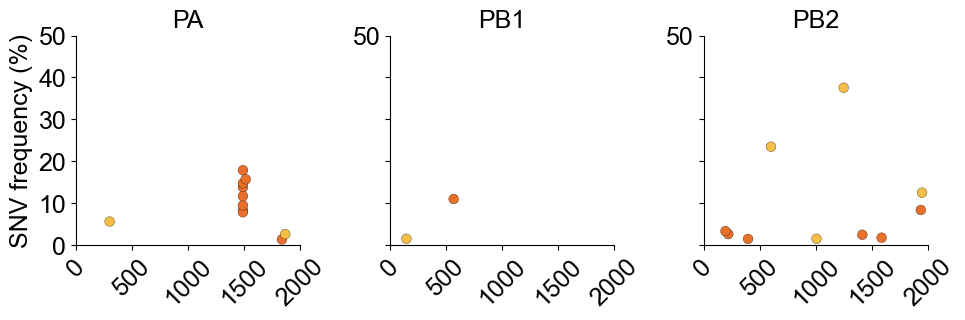

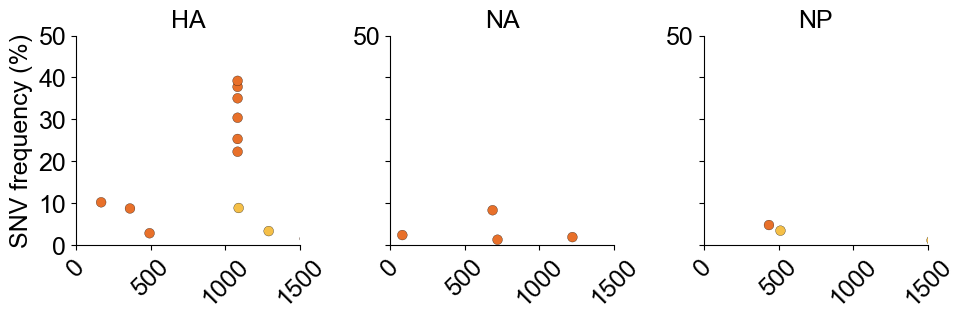

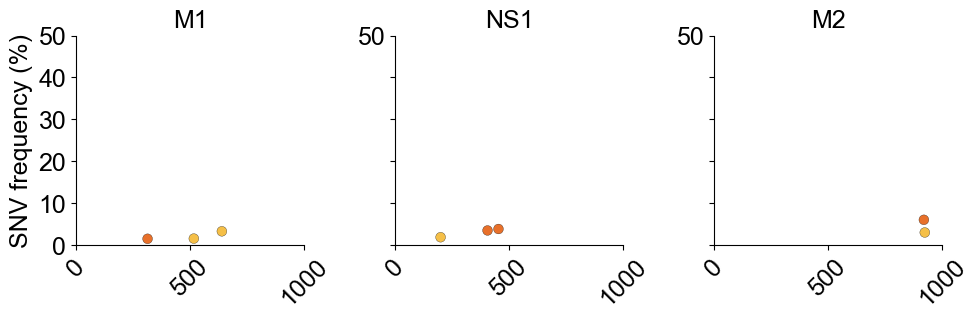

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


palette = {
    "nonsynonymous": "#e8702a",
    "synonymous": "#F5BF47"
}


gene_groups = {
    "Group 1": (["PB2", "PB1", "PA"], 2000),
    "Group 2": (["HA", "NP", "NA"], 1500),
    "Group 3": (["M1", "M2", "NS1"], 1000)
}

for group_name, (genes, xlim) in gene_groups.items():
    subset = shared_vars[shared_vars["gene"].isin(genes)]

    g = sns.FacetGrid(subset, col="gene", col_wrap=3, height=3.5, sharey=True)

    g.map_dataframe(
        sns.scatterplot,
        x="position",
        y="avg_freq_percent",
        hue="syn_non",
        palette=palette,
        s=50,
        edgecolor="black",
        linewidth=0.2
    )

    g.set_axis_labels("", "SNV frequency (%)")
    g.set_titles("{col_name}")
    g.set(ylim=(0, 50))

    for ax, gene_name in zip(g.axes.flatten(), g.col_names):
        xticks = np.arange(0, xlim + 1, 500)  # ticks at 0, 500, 1000,...
        ax.set_xlim(0, xlim)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, rotation=45)
        ax.set_yticks([0, 10, 20, 30, 40, 50])

    g.fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85, right=0.9)
    # g.add_legend(title="Mutation Type")
    
    plt.show()



/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_68328/2942246740.py:7: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



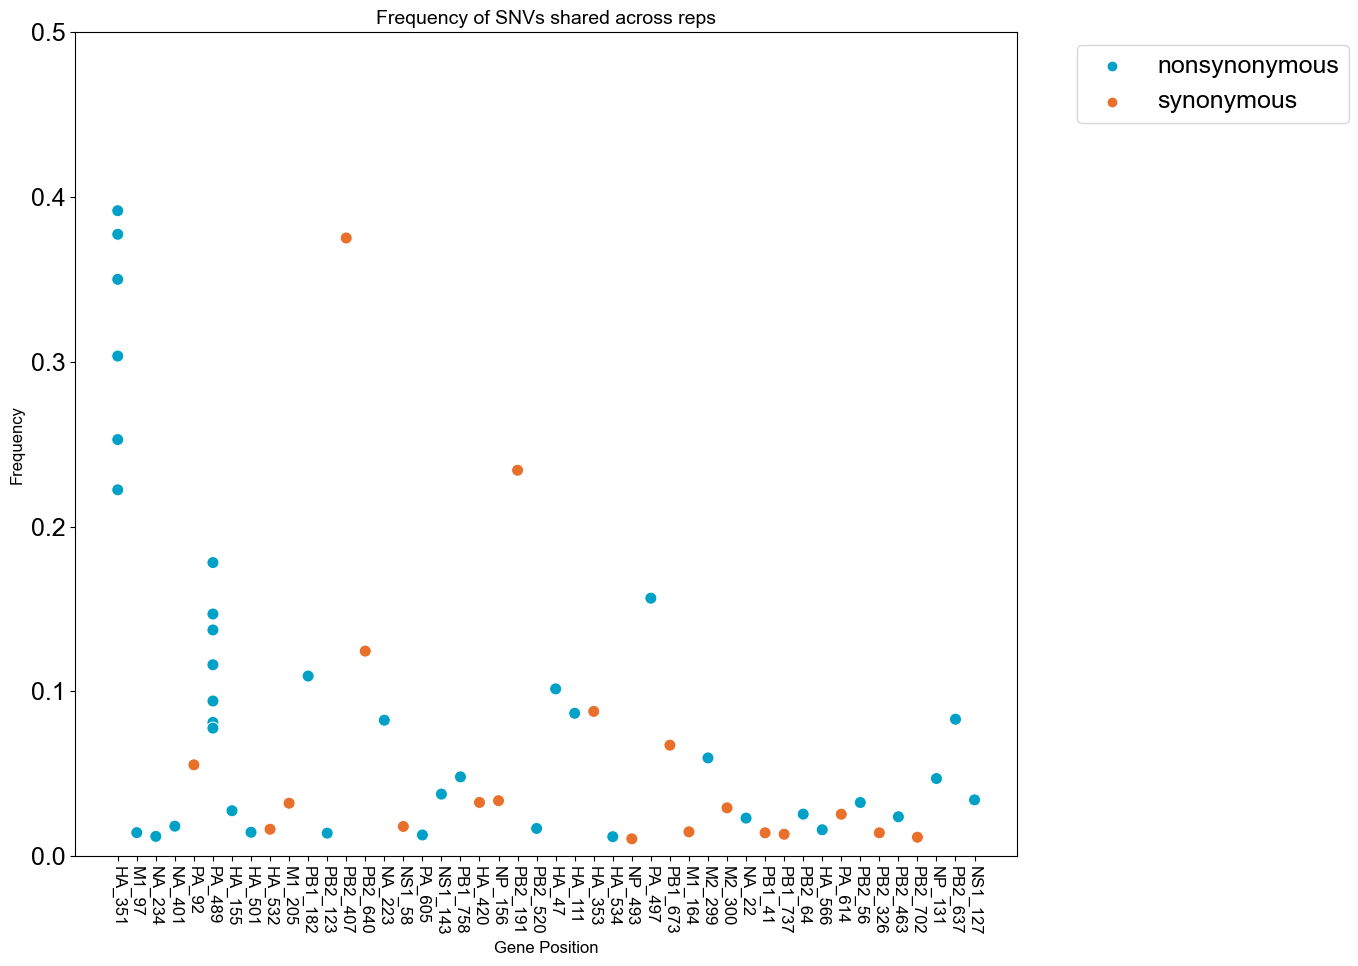

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(14, 10))
sns.scatterplot(data=shared_vars, x="gene_pos", y="avg_freq", hue="syn_non", palette=["#00A1C6", "#e8702a","#0c457d","#F5BF47"],
               s=75)


plt.xlabel("Gene Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of SNVs shared across reps", fontsize=14)
plt.xticks(rotation=270, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,0.5)
# plt.yscale('log')

plt.tight_layout()

plt.show()


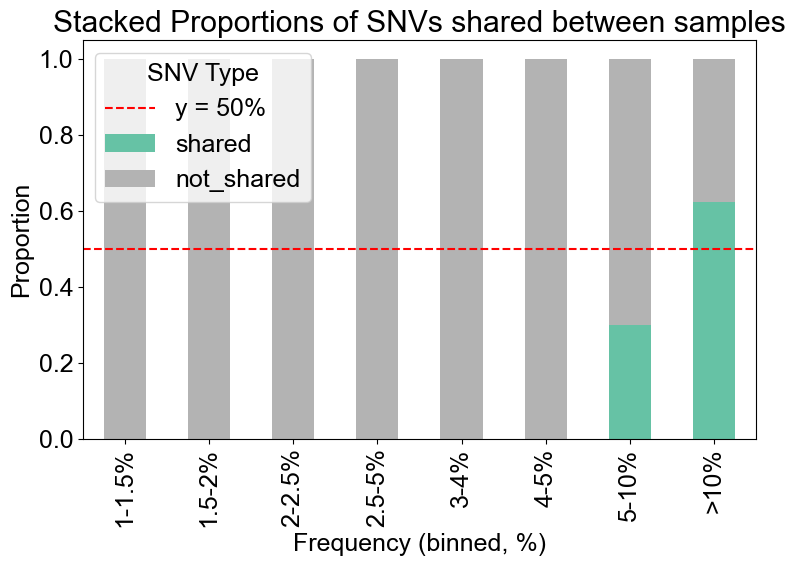

In [118]:
shared_vars['between_dilution'] = shared_vars['gene_pos'].duplicated(keep=False).map({True: 'shared', False: 'not_shared'})
shared_vars

# Example bin edges
bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-5%', '3-4%', '4-5%', '5-10%', '>10%']
shared_vars['freq_bin'] = pd.cut(shared_vars['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = shared_vars.groupby(['freq_bin', 'between_dilution']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())


# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='between_dilution', values='proportion').fillna(0)

pivot_df = pivot_df[['shared', 'not_shared']]


# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of SNVs shared between samples')
plt.legend(title='SNV Type', loc='best')
plt.tight_layout()
plt.show()


In [119]:
##pulling out variants that appear in more than one sample

# Assuming your dataframe is named 'df'
duplicated_gene_pos = shared_vars[shared_vars['gene_pos'].duplicated()]

# To get just the duplicated values in the 'gene_pos' column
duplicated_values = shared_vars[shared_vars['gene_pos'].duplicated()]['gene_pos'].unique()

# Print the duplicated values
print(duplicated_values)

['HA_351' 'PA_489']


In [120]:
# Get rows where 'gene_pos' is NOT duplicated (i.e., appears only once)
unique_gene_pos_rows = shared_vars[~shared_vars['gene_pos'].duplicated(keep=False)]

# If you just want the values (not full rows)
unique_gene_pos_values = unique_gene_pos_rows['gene_pos'].unique()

# Print the unique (non-duplicated) values
print(unique_gene_pos_values)


['M1_97' 'NA_234' 'NA_401' 'PA_92' 'HA_155' 'HA_501' 'HA_532' 'M1_205'
 'PB1_182' 'PB2_123' 'PB2_407' 'PB2_640' 'NA_223' 'NS1_58' 'PA_605'
 'NS1_143' 'PB1_758' 'HA_420' 'NP_156' 'PB2_191' 'PB2_520' 'HA_47'
 'HA_111' 'HA_353' 'HA_534' 'NP_493' 'PA_497' 'PB1_673' 'M1_164' 'M2_299'
 'M2_300' 'NA_22' 'PB1_41' 'PB1_737' 'PB2_64' 'HA_566' 'PA_614' 'PB2_56'
 'PB2_326' 'PB2_463' 'PB2_702' 'NP_131' 'PB2_637' 'NS1_127']


In [121]:
duplicated_values.tolist()

['HA_351', 'PA_489']

In [122]:
# Assuming your dataframe is named 'df' and the list of values is 'specific_values'
specific_values = ['HA_351', 'PA_489']  # replace with your specific values

# Filter the rows where 'gene_pos' is in the specific list of values
filtered_rows = shared_vars[shared_vars['gene_pos'].isin(specific_values)]

# Print the filtered rows
print(filtered_rows)


     segment  position allele coding_region_change gene  Frequency_1  \
0         ha      1081      T            Ile351Lys   HA       0.3613   
23        pa      1489      T            Cys489Ser   PA       0.0719   
104       ha      1081      T            Ile351Lys   HA       0.3451   
206       pa      1489      T            Cys489Ser   PA       0.0883   
299       ha      1081      T            Ile351Lys   HA       0.2758   
476       pa      1489      T            Cys489Ser   PA       0.0661   
736       pa      1489      T            Cys489Ser   PA       0.0124   
986       ha      1081      T            Ile351Lys   HA       0.4293   
1140      pa      1489      T            Cys489Ser   PA       0.1172   
1242      ha      1081      T            Ile351Lys   HA       0.2581   
1353      pa      1489      T            Cys489Ser   PA       0.0914   
1503      ha      1081      T            Ile351Lys   HA       0.4033   
1522      pa      1489      T            Cys489Ser   PA       0.

In [123]:
print(filtered_rows['gene_pos'].nunique)

<bound method IndexOpsMixin.nunique of 0       HA_351
23      PA_489
104     HA_351
206     PA_489
299     HA_351
476     PA_489
736     PA_489
986     HA_351
1140    PA_489
1242    HA_351
1353    PA_489
1503    HA_351
1522    PA_489
Name: gene_pos, dtype: object>


In [124]:
filtered_rows = filtered_rows.sort_values(by=["gene", "position"], ascending=[False, True])
filtered_rows

,segment,position,allele,coding_region_change,gene,Frequency_1,Frequency_2,sample,amino_acid,gene_pos,sample_var,syn_non,rep_shared,avg_freq,gene_pos_nt,avg_freq_percent,freq_bin,between_dilution
23,pa,1489,T,Cys489Ser,PA,0.0719,0.0905,c1,489,PA_489,c1_PA_489,nonsynonymous,shared,0.08120,PA_1489,8.120,5-10%,shared
206,pa,1489,T,Cys489Ser,PA,0.0883,0.2681,c11,489,PA_489,c11_PA_489,nonsynonymous,shared,0.17820,PA_1489,17.820,>10%,shared
476,pa,1489,T,Cys489Ser,PA,0.0661,0.2085,c13,489,PA_489,c13_PA_489,nonsynonymous,shared,0.13730,PA_1489,13.730,>10%,shared
736,pa,1489,T,Cys489Ser,PA,0.0124,0.2816,c15,489,PA_489,c15_PA_489,nonsynonymous,shared,0.14700,PA_1489,14.700,>10%,shared
1140,pa,1489,T,Cys489Ser,PA,0.1172,0.0383,c4,489,PA_489,c4_PA_489,nonsynonymous,shared,0.07775,PA_1489,7.775,5-10%,shared
1353,pa,1489,T,Cys489Ser,PA,0.0914,0.0970,c5,489,PA_489,c5_PA_489,nonsynonymous,shared,0.09420,PA_1489,9.420,5-10%,shared
1522,pa,1489,T,Cys489Ser,PA,0.1612,0.0712,c7,489,PA_489,c7_PA_489,nonsynonymous,shared,0.11620,PA_1489,11.620,>10%,shared
0,ha,1081,T,Ile351Lys,HA,0.3613,0.3936,c1,351,HA_351,c1_HA_351,nonsynonymous,shared,0.37745,HA_1081,37.745,>10%,shared
104,ha,1081,T,Ile351Lys,HA,0.3451,0.0996,c11,351,HA_351,c11_HA_351,nonsynonymous,shared,0.22235,HA_1081,22.235,>10%,shared
299,ha,1081,T,Ile351Lys,HA,0.2758,0.3313,c13,351,HA_351,c13_HA_351,nonsynonymous,shared,0.30355,HA_1081,30.355,>10%,shared


In [125]:
filtered_rows['gene'].value_counts()

PA    7
HA    6
Name: gene, dtype: int64

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_68328/3918001409.py:9: UserWarning:

The palette list has more values (4) than needed (1), which may not be intended.



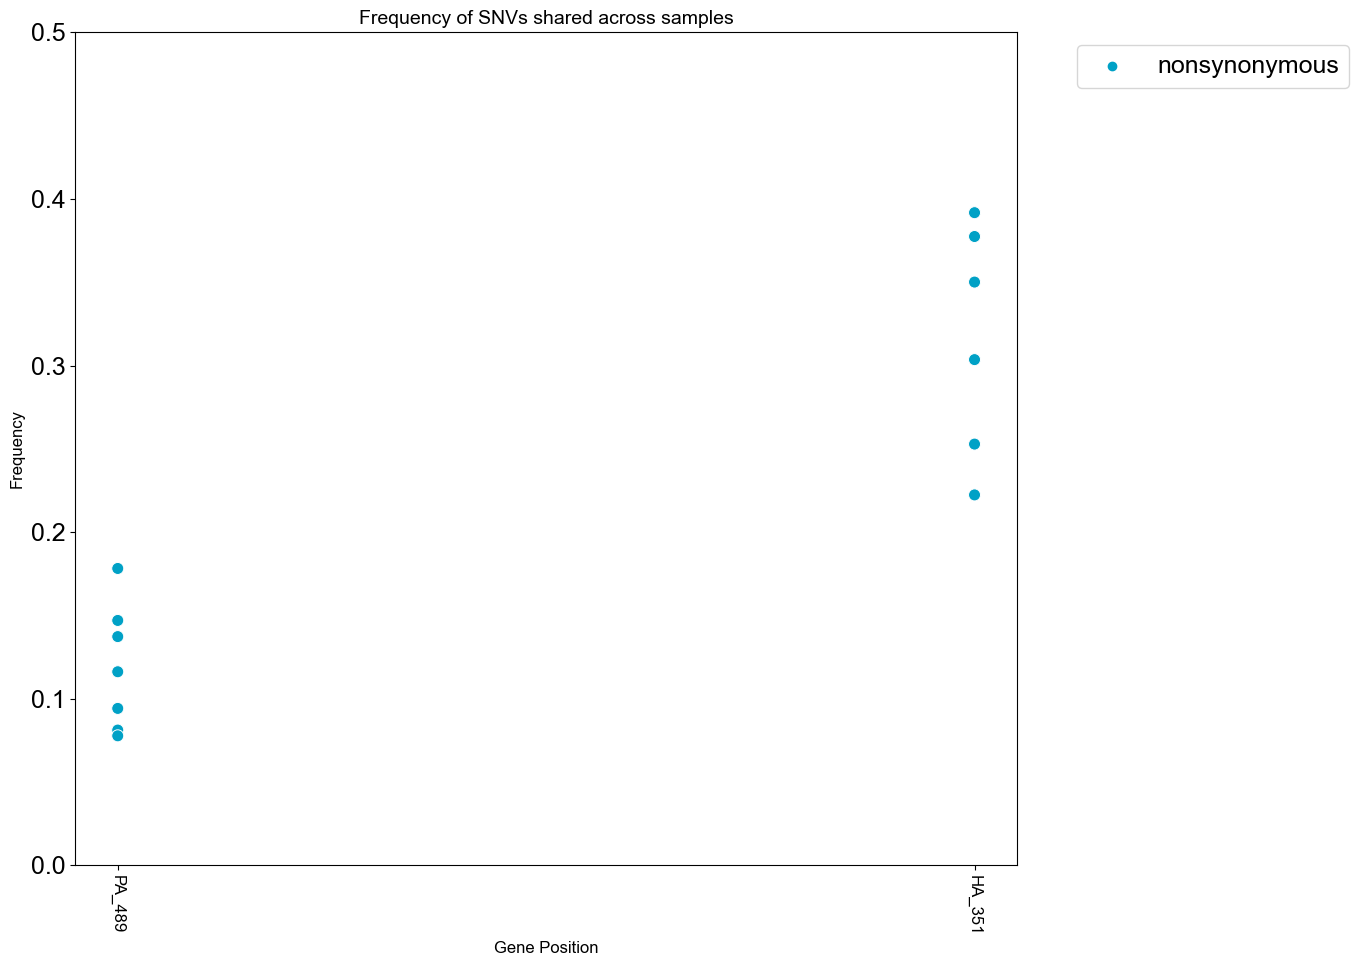

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Filter the dataframe
# pb1_shared = filtered_rows[filtered_rows["gene"] == "PB1"]

# Create the plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_rows, x="gene_pos", y="avg_freq", hue="syn_non", palette=["#00A1C6", "#e8702a","#0c457d","#F5BF47"],
               s=75)

# Formatting
plt.xlabel("Gene Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of SNVs shared across samples", fontsize=14)
plt.xticks(rotation=270, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,0.5)
# plt.yscale('log')

# Show the plot
plt.tight_layout()

# plt.savefig('seq/analysis/figures/SNVs_shared_across_samples.pdf', dpi=300)
plt.show()
